## Preprocessing and dataset exploration

In [7]:
import os
import gzip
import numpy as np

import pickle
import matplotlib.pyplot as plt
import joblib

### Set up directories

In [2]:
# data_dir="/Users/michellehu/git_dirs/ComplexSystems_AMATH563/data/"
wd="/mnt/Backups/jmhu"

data_dir=wd+"/git_dirs/ComplexSystems_AMATH563/data/"
model_dir=wd+"/git_dirs/ComplexSystems_AMATH563/models/"
fig_dir = wd+"/git_dirs/ComplexSystems_AMATH563/figures/"
    
if not os.path.exists(data_dir):
    !mkdir $data_dir

if not os.path.exists(model_dir):
    !mkdir $model_dir

if not os.path.exists(fig_dir):
    !mkdir $fig_dir

### Download files

In [3]:
gz_fns=["t10k-labels-idx1-ubyte.gz", 
        "t10k-images-idx3-ubyte.gz", 
        "train-labels-idx1-ubyte.gz", 
        "train-images-idx3-ubyte.gz"]
data_paths=[data_dir + gz for gz in gz_fns]
data_sources=["http://yann.lecun.com/exdb/mnist/" + gz for gz in gz_fns]

for f, source in zip(data_paths, data_sources):
    if not os.path.exists(f):
        print("Missing", f)
        print("Downloading now...")
        !wget -O $f $source

### Load data

In [4]:
# From https://github.com/daniel-e/mnist_octave/blob/master/mnist.py
def loadY(fnlabel):
    f = gzip.open(fnlabel, 'rb')
    f.read(8)
    return np.frombuffer(f.read(), dtype = np.uint8)

def loadX(fnimg):
    f = gzip.open(fnimg, 'rb')
    f.read(16)
    return np.frombuffer(f.read(), dtype = np.uint8).reshape((-1, 28*28))

# Unzip, reformat and reshape
trainX = loadX(data_dir+"train-images-idx3-ubyte.gz")
trainY = loadY(data_dir+"train-labels-idx1-ubyte.gz")
testX = loadX(data_dir+"t10k-images-idx3-ubyte.gz")
testY = loadY(data_dir+"t10k-labels-idx1-ubyte.gz")

### Check shapes, sizes and values

In [5]:
# double check that these reshapings make sense
print(trainX[0].shape)
print(trainX[0].reshape(28,28).shape)
print("28*28 =", 28*28)

# Check sizes of train and test datasets and labels
print("train A:", trainX.shape)
print("train B:", trainY.shape)
print("test A:", testX.shape)
print("test B:", testY.shape)

# Look at class distribution
# http://rasbt.github.io/mlxtend/user_guide/data/loadlocal_mnist/
print('labels: %s' % np.unique(trainY))
print('Class distribution: %s' % np.bincount(trainY))

(784,)
(28, 28)
28*28 = 784
train A: (60000, 784)
train B: (60000,)
test A: (10000, 784)
test B: (10000,)
labels: [0 1 2 3 4 5 6 7 8 9]
Class distribution: [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]


### Visualize first 10 samples of training data

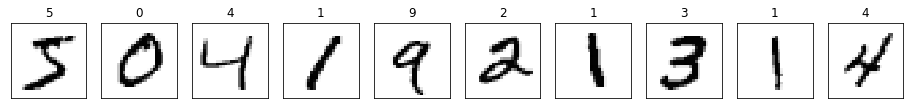

In [6]:
plt.figure(figsize=(16,4))
for i in range(10):
    ax = plt.subplot(1, 10, i + 1)
    img = trainX[i].reshape((28,28))
    ax.imshow(img, cmap="Greys")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(trainY[i])

In [ ]:
### Save data for later

In [ ]:
# Pickling for faster load (probably unecessary right now)
import pickle

with open(data_dir+"pickled_mnist.pkl", "bw") as fh:
    data = (trainX, 
            testX, 
            trainY,
            testY,
            train_labels_one_hot,
            test_labels_one_hot)
    pickle.dump(data, fh)